In [1]:
from fastbook import *

/mnt/bigdrive1/cnn/anaconda3/envs/fastai/lib/python3.8/site-packages/torch/cuda/__init__.py:125: UserWarning: 
GeForce RTX 2080 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 compute_37.
If you want to use the GeForce RTX 2080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#3) [Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/models'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
path_images = path/'images'

In [6]:
path_images.ls()

(#7396) [Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/english_setter_58.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/newfoundland_77.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/american_bulldog_168.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/Bengal_76.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/Abyssinian_196.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/Bengal_123.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/leonberger_179.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_116.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/pug_33.jpg'),Path('/home/igolgi/.fastai/data/oxford-iiit-pet/images/scottish_terrier_155.jpg')...]

In [11]:
doc(ImageDataLoaders.from_name_func)

In [12]:
doc(get_image_files)

In [7]:
def is_cat(x): return x[0].isupper()

In [8]:
fnames = get_image_files(path_images)

In [9]:
dls = ImageDataLoaders.from_name_func(path_images, fnames, label_func=is_cat, valid_pct=0.2, seed=42, item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [17]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.168756,0.046380,0.015562,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.064327,0.033529,0.011502,00:18
1,0.064651,0.035650,0.011502,00:18
2,0.032532,0.023831,0.008119,00:18
3,0.021395,0.020375,0.008119,00:18


In [18]:
interp = ClassificationInterpretation.from_learner(learn)

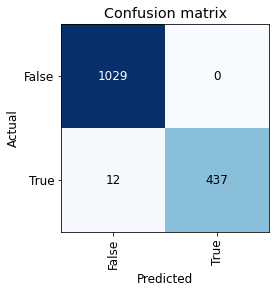

In [19]:
interp.plot_confusion_matrix()

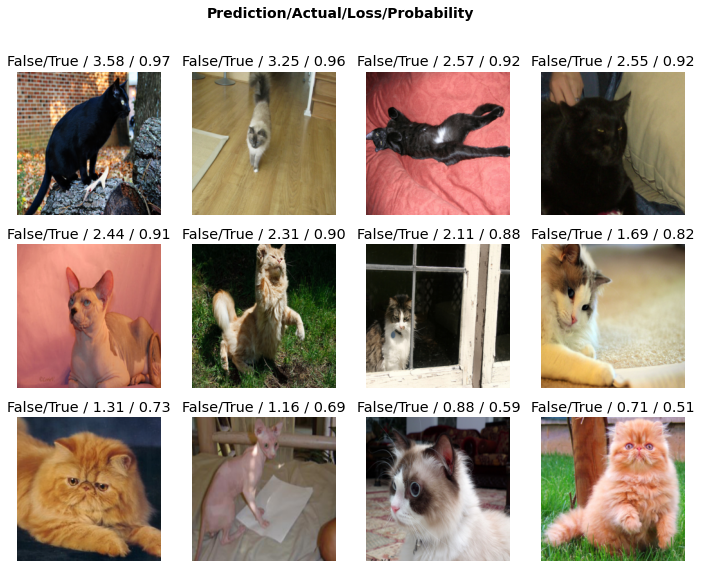

In [20]:
interp.plot_top_losses(12, nrows=3)

The model is making 12 mistakes in terms of classifying cats and dogs.

In [21]:
doc(learn.export)

In [24]:
save_path = Path()

Path('.')

In [30]:
learn.export('cat_or_dog_resnet18_export1.pkl')

In [31]:
import shutil
shutil.move(path_images/'cat_or_dog_resnet18_export1.pkl', save_path/'cat_or_dog_resnet18_export1.pkl')

Path('cat_or_dog_resnet18_export1.pkl')

In [32]:
save_path.ls(file_exts='.pkl')

(#3) [Path('cat_or_dog_resnet34_export.pkl'),Path('cat_or_dog_resnet18_export1.pkl'),Path('export.pkl')]

In [24]:
doc(learn.fine_tune)

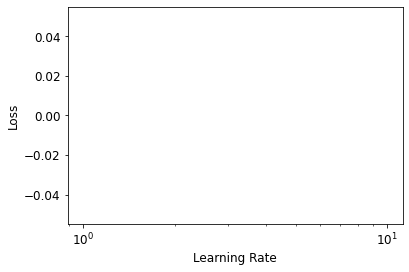

In [33]:
learn.lr_find()

#### Lets try the larger resnet to see what we get and if we get better.

In [42]:
learn2 = cnn_learner(dls, resnet34, metrics=error_rate)

In [43]:
learn2.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.151509,0.019392,0.007442,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.050215,0.010730,0.004736,00:29
1,0.074517,0.019903,0.006766,00:29
2,0.039771,0.020882,0.006089,00:29
3,0.029008,0.041914,0.009472,00:29
4,0.021945,0.009180,0.004060,00:29
5,0.025578,0.032237,0.011502,00:29
6,0.013033,0.005601,0.002706,00:29
7,0.009928,0.006296,0.003383,00:29


### 0% error? Wow! :-)

In [44]:
interp2 = ClassificationInterpretation.from_learner(learn2)

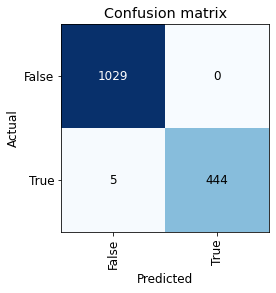

In [45]:
interp2.plot_confusion_matrix()

Perfect confusion matrix!

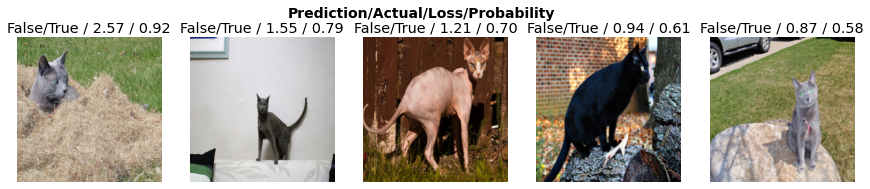

In [46]:
interp2.plot_top_losses(5, nrows=1)

In [33]:
learn2.export(fname="cat_or_dog_resnet34_export.pkl")

In [ ]:
learn2.